<a href="https://colab.research.google.com/github/Sainiakshay798/capston/blob/main/capstone_cap_769.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, MaxPooling2D, Activation
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing import image
import plotly.express as px
import keras
from keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
import random


In [3]:
train = pd.read_csv("/content/drive/MyDrive/capston/train.csv")
test = pd.read_csv("/content/drive/MyDrive/capston/test (1).csv")


In [4]:
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(train.shape)
print(test.shape)

(3437, 785)
(3442, 784)


In [7]:
train.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
test.isnull()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
x_train = train.drop(['label'], axis=1)
y_train = train.label
x_test = test.copy()

In [10]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3433,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3434,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3435,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_train

0       1
1       0
2       1
3       4
4       0
       ..
3432    5
3433    5
3434    2
3435    0
3436    5
Name: label, Length: 3437, dtype: int64

Text(0.5, 1.0, 'Frequency of Digits')

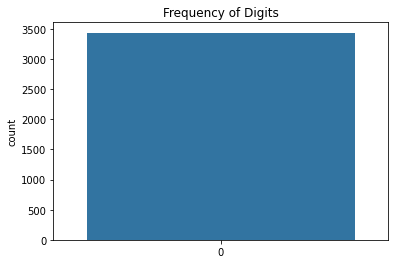

In [12]:
plt.figure()
sns.countplot(train.label)
plt.title('Frequency of Digits')

In [13]:
#normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
#reshaping 
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

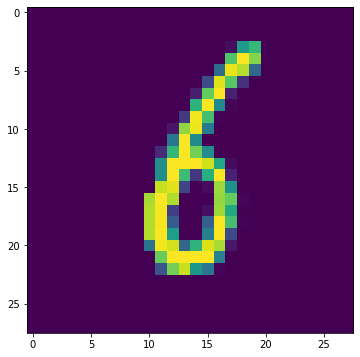

In [15]:
#displaying random image
no_images=len(x_train)

fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(x_train[random.randint(0,no_images)]) 
plt.show()

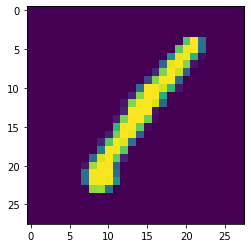

In [16]:
#displaying first label image
plt.imshow(x_train[0]) 
plt.show()

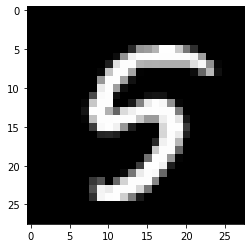

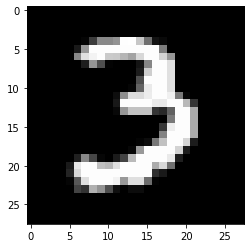

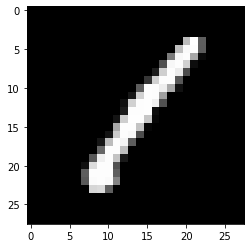

In [17]:
plt.imshow(x_train[8,:].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(x_train[9,:].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(x_train[0,:].reshape(28,28),cmap="gray")
plt.show()

In [18]:
#splitting data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

#label encoding
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_val = keras.utils.to_categorical(y_val, num_classes = 10)

In [19]:
#sequential model

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
model.add(layers.BatchNormalization(name='bn_1'))
model.add(layers.Activation('relu', name='relu_1'))
model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
model.add(layers.Dropout(0.2, name='drop_1'))
model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
model.add(layers.BatchNormalization(name='bn_2'))
model.add(layers.Activation('relu', name='relu_2'))
model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
model.add(layers.Dropout(0.2, name='drop_2'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer = "Adam", loss = "CategoricalCrossentropy", metrics = "accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_1 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_1_2 (Conv2D)         (None, 26, 26, 32)        9248      
                                                                 
 bn_1 (BatchNormalization)   (None, 26, 26, 32)        128       
                                                                 
 relu_1 (Activation)         (None, 26, 26, 32)        0         
                                                                 
 mp2d_1 (MaxPooling2D)       (None, 13, 13, 32)        0         
                                                                 
 drop_1 (Dropout)            (None, 13, 13, 32)        0         
                                                                 
 conv2d_2_1 (Conv2D)         (None, 11, 11, 64)        1

In [21]:
#model fitting 
training = model.fit(x_train, y_train, validation_data = (x_val, y_val), steps_per_epoch=100, epochs=25, validation_steps=10)

Epoch 1/25
100/100 [==============================] - 16s 137ms/step - loss: nan - accuracy: 0.2135 - val_loss: nan - val_accuracy: 0.0843
Epoch 2/25
100/100 [==============================] - 15s 152ms/step - loss: nan - accuracy: 0.1059 - val_loss: nan - val_accuracy: 0.0843
Epoch 3/25
100/100 [==============================] - 13s 127ms/step - loss: nan - accuracy: 0.1077 - val_loss: nan - val_accuracy: 0.0843
Epoch 4/25
100/100 [==============================] - 12s 122ms/step - loss: nan - accuracy: 0.1080 - val_loss: nan - val_accuracy: 0.0843
Epoch 5/25
100/100 [==============================] - 12s 119ms/step - loss: nan - accuracy: 0.1051 - val_loss: nan - val_accuracy: 0.0843
Epoch 6/25
100/100 [==============================] - 10s 99ms/step - loss: nan - accuracy: 0.1095 - val_loss: nan - val_accuracy: 0.0843
Epoch 7/25
100/100 [==============================] - 12s 117ms/step - loss: nan - accuracy: 0.1051 - val_loss: nan - val_accuracy: 0.0843
Epoch 8/25
100/100 [========

100/100 [==============================] - 10s 95ms/step - loss: nan - accuracy: 0.1098 - val_loss: nan - val_accuracy: 0.0843


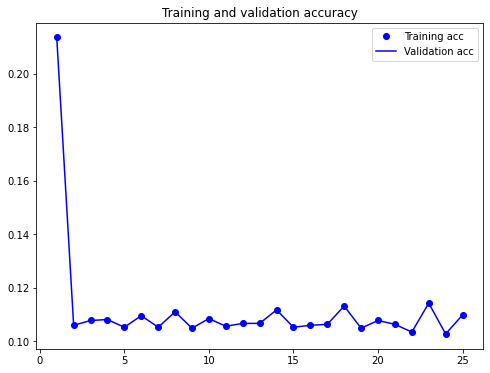

<Figure size 432x288 with 0 Axes>

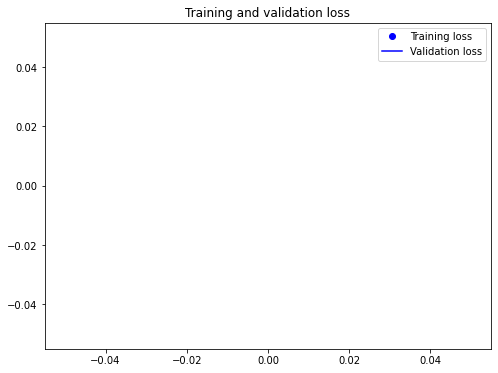

In [22]:
acc = training.history['accuracy']
val_acc = training.history['accuracy']
loss = training.history['loss']
val_loss = training.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [23]:
predictions = model.predict(x_test).argmax(axis=1)
predictions


108/108 [==============================] - 4s 36ms/step


array([0, 0, 0, ..., 0, 0, 0])

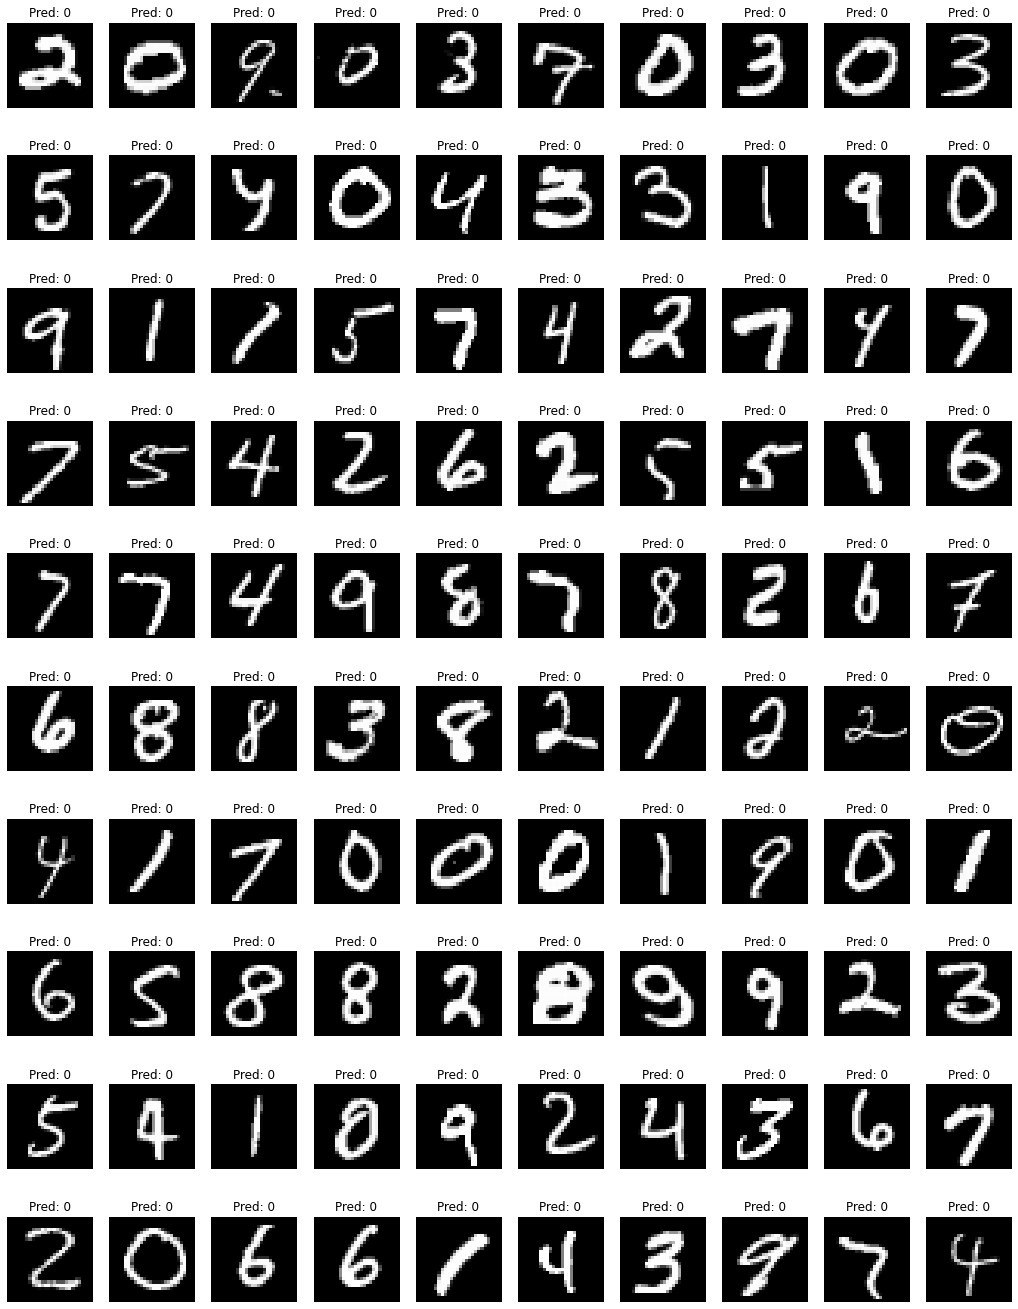

In [24]:
plt.figure(figsize=(18, 24))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()

In [25]:
my_submission = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)), 'Label': predictions})
my_submission.to_csv('submission.csv', index=False)